# Compte rendu Mini-projet:
# Un exemple de système chaotique

## I-Introduction du modèle:

On cherche à modéliser un système chaotique:

Contrairement à ce que l'on pourrait croire un système n'est pas chaotique car il y a beaucpup d'équations ,de variables ou de paramètresintroduit de manière aléatoire. Ce qui détermine un système chaotique sont les conditions initiales c'est à dire qu'il dépend énormément de ces conditions un seul petit changement change
totalement la représentation du système.

On étudiera dans notre cas l'équation logisitque un des systémes chaotiques le plus connu.


## II- Description du modèle et de la méthode de résolution:
On suppose que cette dynamique décrit correctement une population de lapins. On note $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (une par an). Alors, $n_{i+1} = \alpha n_i$. Si $\alpha$ est une constante, alors, on obtiendra l'année $p$

$$ n_p = \alpha^p n_0 $$

c'est-à-dire une croissance exponentielle de la population de lapins.

Mais la quantité finie de ressources ainsi que les prédateurs va limiter cette croissance séculaire. Cela se traduit mathématiquement par le fait que $\alpha$ ne puisse plus être une constante, mais est une fonction de $n_i$ ainsi que d'autres paramètres. 
Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire:

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

La forme de l'équation d'évolution de la population devient alors

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

et peut se réécrire avec la nouvelle variable $x_i = n_i / n_{\max}$

$$ x_{i+1} = r (1-x_i)x_i $$

que l'on appelle « l'équation logistique ». Pour l'étude de cette équation, on introduit la fonction

$$ f(x) = r (1-x) x $$  avec $r$ est compris entre 1 et 4

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique de tel manière qu'un simple changement sur r donnera un compertement asymptotique de la fonction totalement différent d'une autre valeur très proche.

On modélisera à l'aide de construction de fonctions Pyhton et de boucle ayant pour but de faire une récurence le comportment de la suite selon les valeurs de $x_0$ et de $r$ . Puis nous traçerons un diagramme de bifurcation pour la manière de la limite de la fonction à dépendre de $r$ 

Pour cela, on prendra un grand nombre de valeurs de $r$ comprises entre 2.5 et 4, avec $x_0=0.00001$. Pour
chaque valeur de $r$,on calculera les 1000 premiers termes de la suite, en gardant uniquement les 100 derniers termes. Si la limite est
bien définie, ces 100 derniers termes devraient être très semblables, ce qui n'est pas toujours le cas 

Afin de traçer ce graphique on suivra que pour une valeur de $r$ donnée en abscisses, tracer les 100 derniers termes de la suite en ordonnée (avec des petits points)
répéter cette opération pour toutes les valeurs de $r$ choisies.


Enfin on traçera l'exposant de Lyapunov selon $r$ on part du principe que la distance entre deux solutions d'un système chaotique augmente de manière expoentielle de la forme:
$$ e^{t \lambda(r)} $$ avec $$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$
De plus  lorsque $\lambda$ est une fonction à valeur négative, la suite associée à l'équation logistique est convergente. À l'inverse, pour les valeurs positives de $\lambda$, la suite diverge.

## III-Programme Pyhton: 


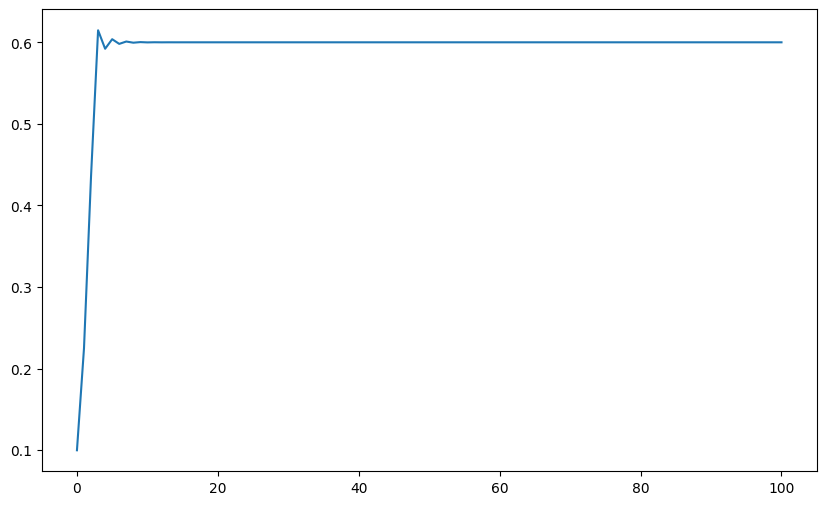

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def eq_logistique(r, x):# On définit l'équation logistique 
    return r *(1 - x)* x

def suite1(r, x0, iterations):# On définit ici notre suite par récurrence.
    suite = [x0]
    for k in range(iterations):
        x0 = eq_logistique(r, x0)
        suite.append(x0)
    return suite


x0 = 0.1
iterations = 100

# Représentation graphique
plt.figure(figsize=(10, 6))
suite = suite1(2.5, x0, iterations)
plt.plot(suite)


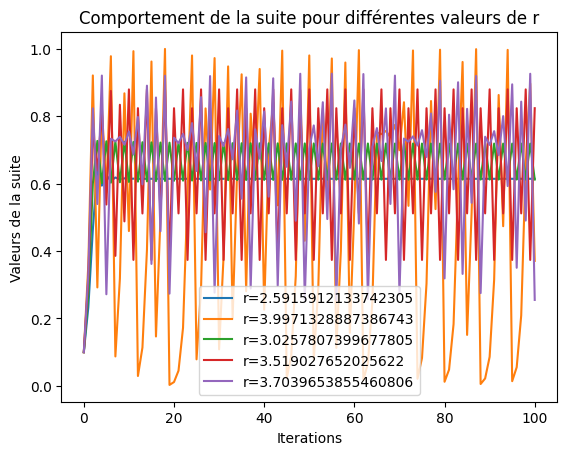

In [8]:

r_values = np.random.uniform(2.5, 4, 5)# génère 5 valeurs au hasard entre 2.5 et 4
for r in r_values:
    suite =suite1(r, x0, iterations)
    plt.plot(suite, label=f'r={r}')

plt.title('Comportement de la suite pour différentes valeurs de r')
plt.xlabel('Iterations')
plt.ylabel('Valeurs de la suite')
plt.legend()
plt.show()

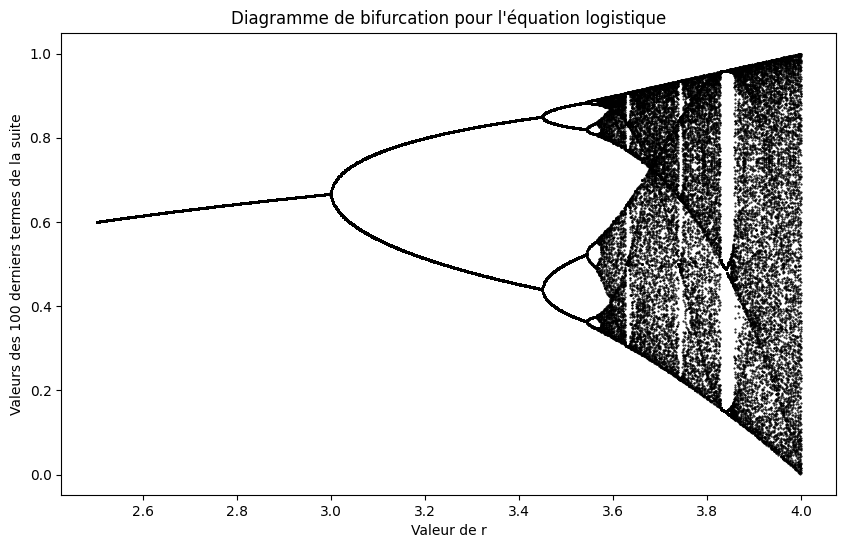

In [31]:

def eq_logistique(r, x):
    return r * (1 - x) * x

def suite2(r, x0, iterations):
    suite = [x0]
    for k in range(iterations):
        x0 = eq_logistique(r, x0)
        suite.append(x0)
    return np.array(suite[-100:])  # On garde seulement les 100 derniers termes

# Paramètres
r_possibles=1000 # Nombre de valeurs possibles que r peut prendre
x0 = 0.00001
iterations = 1000

# Générer des valeurs de r entre 2.5 et 4
r_values = np.linspace(2.5, 4, r_possibles)


resultats = np.array([suite2(r, x0, iterations) for r in r_values])# On calcule les 100 derniers termes de la suite pour chaque valeur de r possibles

plt.figure(figsize=(10, 6))
for i in range(r_possibles):
     plt.plot([r_values[i]] * 100, resultats[i],'k.' ,markersize=1)# On trace le diagramme de bifurcation à l'aide de la boucle for pour avoir notre nuage de points.

plt.title('Diagramme de bifurcation pour l\'équation logistique')
plt.xlabel('Valeur de r')
plt.ylabel('Valeurs des 100 derniers termes de la suite')
plt.show()


De même si on change la valeur de $x_0$ à 0,1 on a:

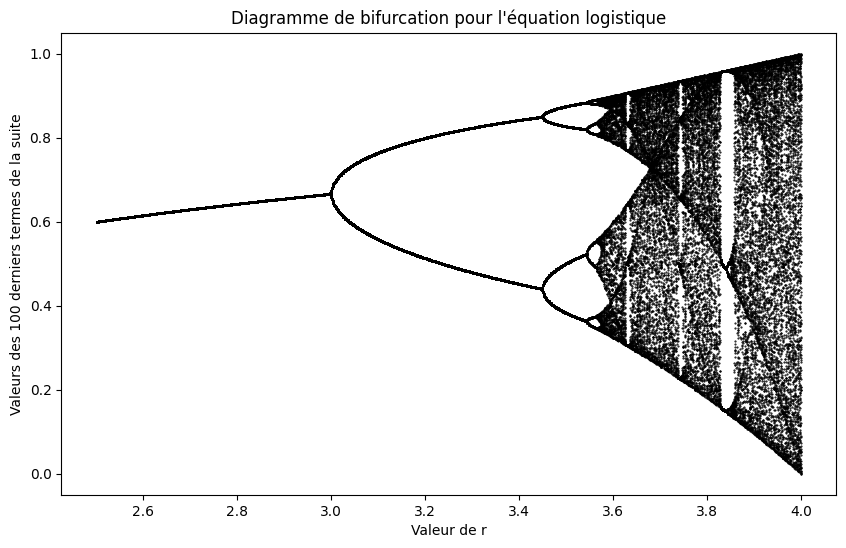

In [29]:


def eq_logistique(r, x):
    return r*(1 - x)*x

def suite2(r, x0, iterations):
    suite = [x0]
    for k in range(iterations):
        x0 = eq_logistique(r, x0)
        suite.append(x0)
    return np.array(suite[-100:])  # On garde seulement les 100 derniers termes

# Paramètres
r_possibles=1000 # Nombre de valeurs possibles que r peut prendre
x0 = 0.1
iterations = 1000

# Générer des valeurs de r entre 2.5 et 4
r_values = np.linspace(2.5, 4, r_possibles)


resultats = np.array([suite2(r, x0, iterations) for r in r_values])# On calcule les 100 derniers termes de la suite pour chaque valeur de r possibles

plt.figure(figsize=(10, 6))
for i in range(r_possibles):
     plt.plot([r_values[i]] * 100, resultats[i],'k.' ,markersize=1)# On trace le diagramme de bifurcation à l'aide de la boucle for pour avoir notre nuage de points.

plt.title('Diagramme de bifurcation pour l\'équation logistique')
plt.xlabel('Valeur de r')
plt.ylabel('Valeurs des 100 derniers termes de la suite')
plt.show()


De même si on change la valeur de $x_0$ à 0,000000000001 on a:

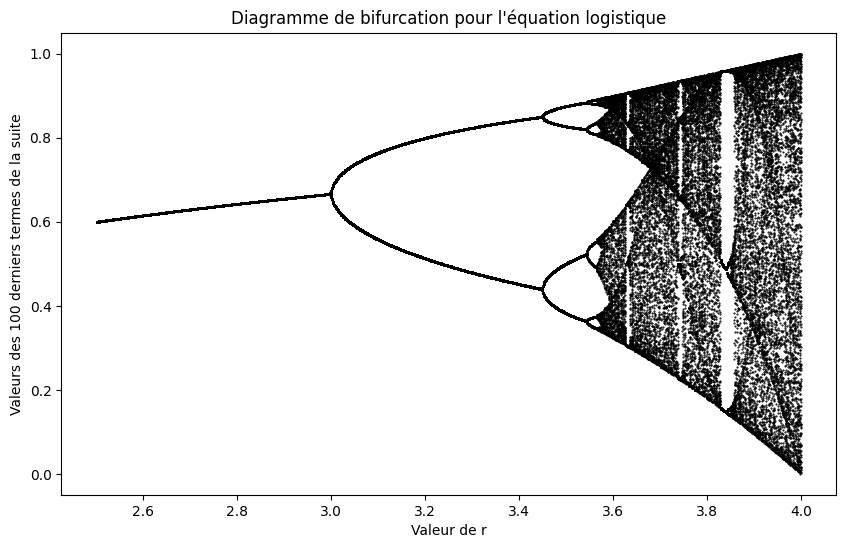

In [4]:
def eq_logistique(r, x):
    return r*(1 - x)*x

def suite2(r, x0, iterations):
    suite = [x0]
    for k in range(iterations):
        x0 = eq_logistique(r, x0)
        suite.append(x0)
    return np.array(suite[-100:])  # On garde seulement les 100 derniers termes

# Paramètres
r_possibles=1000 # Nombre de valeurs possibles que r peut prendre
x0 = 0.000000000001
iterations = 1000

# Générer des valeurs de r entre 2.5 et 4
r_values = np.linspace(2.5, 4, r_possibles)


resultats = np.array([suite2(r, x0, iterations) for r in r_values])# On calcule les 100 derniers termes de la suite pour chaque valeur de r possibles

plt.figure(figsize=(10, 6))
for i in range(r_possibles):
     plt.plot([r_values[i]] * 100, resultats[i],'k.' ,markersize=1)# On trace le diagramme de bifurcation à l'aide de la boucle for pour avoir notre nuage de points.

plt.title('Diagramme de bifurcation pour l\'équation logistique')
plt.xlabel('Valeur de r')
plt.ylabel('Valeurs des 100 derniers termes de la suite')
plt.show()


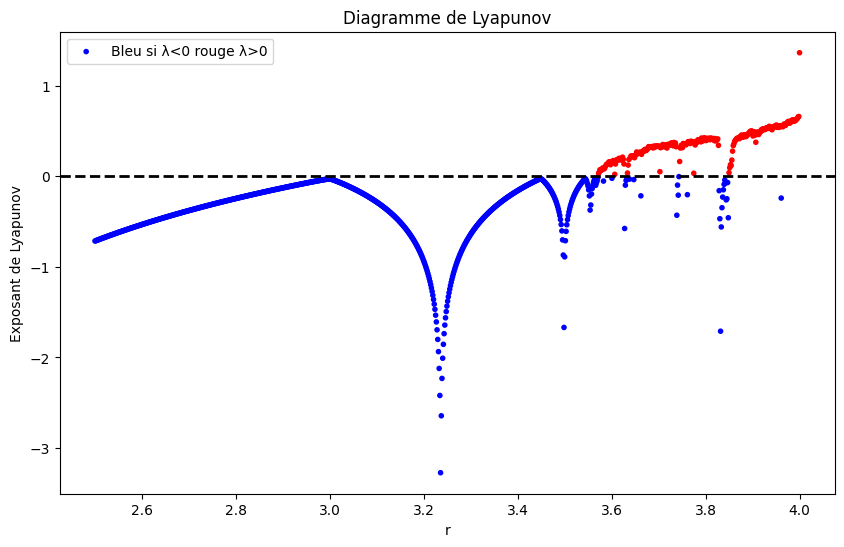

Nombre de rouge: 257
Nombre de bleu: 743


In [15]:

def eq_logistique(x, r):
    return r * (1 - x)*x


def lyapunov_exposant(x0, r, n): #Calcul de l'exposant de Lyapunov d'après la formule de l'énoncé.
    
    lyapunov = 0.0
    x = x0

    for k in range(n):
        derivee = r - 2 * r * x
        lyapunov += np.log(abs(derivee + 1e-10))  # Ajout d'une petite valeur epsilon pour ne jamais avoir log de 0
        x = eq_logistique(x, r)

    return lyapunov / n 


valeurs_r = np.linspace(2.5, 4.0, 1000)# tableau des 1000 valeurs prises par r de 2.5 à 4 


iterations = 1000


valeurs_lyapunov = [lyapunov_exposant(0.5, r, iterations) for r in valeurs_r]# Calcul des exposants de Lyapunov pour chaque valeur de r


couleurs = ['red' if lyapunov > 0 else 'blue' for lyapunov in valeurs_lyapunov]# Points en rouge si l'exposant de Lyapunov est au-dessus de zéro, sinon en bleu

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.scatter(valeurs_r, valeurs_lyapunov, c=couleurs, marker='.',label='Bleu si λ<0 rouge λ>0')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Diagramme de Lyapunov')
plt.xlabel('r')
plt.ylabel('Exposant de Lyapunov')
plt.legend()
plt.show()


b=0
r=0

for element in couleurs: # On définit un compteur pour avoir le nombre de valeurs de r convergente et divergente
    if element == 'red':
        r += 1
    elif element == 'blue':
        b += 1

# Afficher les résultats
print("Nombre de rouge:", r)
print("Nombre de bleu:", b)

## IV-Conclusion:

On remarque tout d'abord sur le premier graphique que pour :
$$
\left\{
    \begin{array}{lll}
r=2.5\\
x_0=0.1\\
 \end{array}
\right.
$$ la suite a une limite finie qui est 0,6 en en effet on voit bien l'asymptote pour 100 itérations.


Ensuite sur le second graphique à l'aide de la fonction 'random' de la bibliothèque numpy on a généré des valeurs de r au hasad entre 2.5 et 4 et cela donne de nombreuses courbes qui semblent diverger.

Intéressons nous aux trois diagrammes de bifurcation. On obtient bien ce qui nous était démandé dans l'énoncé.  On remarque ensuite que le paramètre $x_0$ ne change rien aux diagrammes d'autres valeurs ont été rentrés mais par souci de présentation toutes ne sont pas affichées. On remarque ensuite qu'on a une une courbe de $r$=2,5 à $r$=3. Sur cette intervalle on a une convergence puis le graphe se sépare en 2 courbes distinctes.

Puis à $r$=3,6 on a des nuages de points ce qui signifie que la suite diverge et ce jusqu'à $r$=4.
Il y a tout de même des zones avec très peu de points ce qui signifie que pour certains points précis on pourrait avoir des convergences éventuelles.


Enfin on s'intéresse au diagramme de Lyapunov, on obtient bien ce qu'on voulait tracer. On obtient 257 points au dessus de 0 et et 743 en dessous.
On a donc un bon nombre de valeurs de $r$ tel que la suite converge bien et ce de 2,5 à 4. Or à partir de $r$=3,6,on observe que $\lambda$ devient positif donc que la suite diverge pour ces valeurs de $r$. On observe tout de même qu'après 3,6 qu'il y a des valeurs de $r$ où l'exposant de Lyapunov est négatif et donc que la suite converge.


En comparant ce diagramme aù diagramme de bifurcation on remarque que les deux sont très semblables.
Tout d'abord pour $r$ jusqu'à 3 on a une convergence plutôt uniforme. Puis on a tout de même une convergence jusqu'à environ $r$=3,6. On observe alors sur le diagramme de bifurcation des nuages de points et sur l'autre que les les valeurs de $\lambda$ deviennent positives: il y a bien divergence de la suite. 
Toutefois sur le diagramme de bifurcation on observe des fines bandes avec très peu de points et quand on regarde les valeurs de r correspondantes sur le diagramme de Lyapunov on observe que c'est la on l'on à très peu de points en dessous de 0 comparés aux autres. Et donc que pour ces rares valeurs il y a une convergence de la suite.  


On en conclut que sur l'intervalle  $r$ ∈([2.5,4]) la suite converge bien plus souvent qu'elle ne diverge et est donc plutôt stable .En effet sur 1000 valeurs de $r$ presque $\frac{3}{4}$ de ces dernières sont convergentes ce qui est plutôt surprenant étant donné que le système était chaotique on aurait pu s'attendre à une répartition bien plus homogène en valeur divergente et convergente.

On a donc modélisé un système chaotique en traçant 3 fonctions distinctes représentant le suite et ces valeurs convergentes et divergentes selon $r$, plus précisément l'équation logistique et montrer que la convergence de la suite dépend totalement des conditons initiales,une petite varation de la valeur de l'ordre du millième peut faire soudainement diverger la suite, mais que que la valeur de $x_0$ elle ,n'avait aucun impact.De plus sur l'intervalle donné précédemment la suite est plus stable qu'instable. Il serait intéressant d'étudier le comportement de la suite sur une plus grande plage de valeur de r et de vérifier si $x_0$ n'a toujours pas d'influence il faudrait toutfeois choisir d'autres intervalles pour que la complexité du programme ne soit pas trop grande, le diagramme de bifurcation mets déjà une quizaine de secondes à s'afficher trop de valeurs à afficher rendrait cet affichage long.

Finalement il serait intéressant de reprendre le diagramme de bifurcation et de Lyapunov pour des systèmes chaotiques qui s'y prêtent et vérifier qu'ils représentent bien tout deux les mêmes valeurs de convergence et de divergence.
